In [2]:
import numpy as np
import matplotlib.pyplot as plt

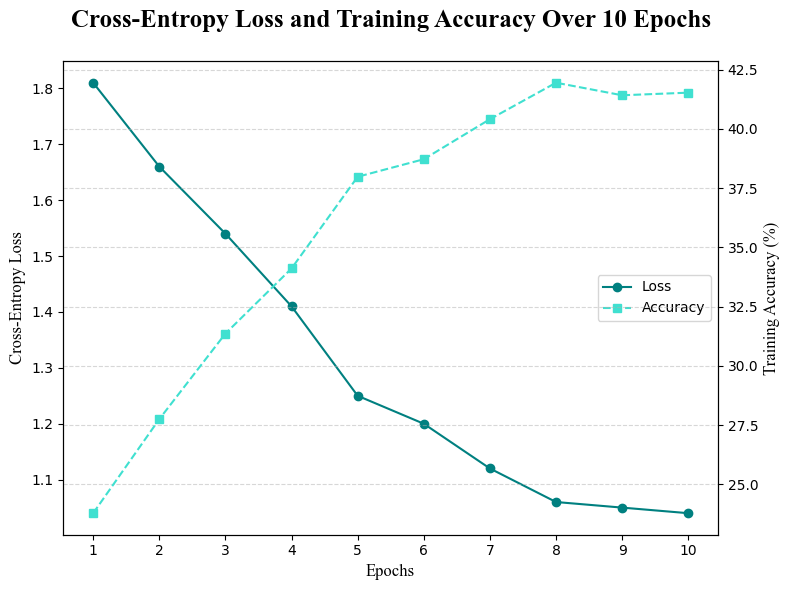

In [4]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(1, 11) 
loss_values = [1.81, 1.66, 1.54, 1.41, 1.25, 1.20, 1.12, 1.06, 1.05, 1.04]
accuracy_values = [23.78, 27.75, 31.36, 34.11, 37.98, 38.72, 40.41, 41.95, 41.42, 41.53]

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.set_xlabel("Epochs", fontname="Times New Roman", fontsize=12)
ax1.set_ylabel("Cross-Entropy Loss", color="black", fontname="Times New Roman", fontsize=12)
loss_line, = ax1.plot(epochs, loss_values, marker="o", linestyle="-", color="teal", label="Loss")
ax1.tick_params(axis="y", labelcolor="black")
ax1.set_xticks(epochs)

ax2 = ax1.twinx()
ax2.set_ylabel("Training Accuracy (%)", color="black", fontname="Times New Roman", fontsize=12)
acc_line, = ax2.plot(epochs, accuracy_values, marker="s", linestyle="--", color="turquoise", label="Accuracy")
ax2.tick_params(axis="y", labelcolor="black")

# Combine legends from both axes
lines = [loss_line, acc_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="center right", fontsize=10)

plt.title("Cross-Entropy Loss and Training Accuracy Over 10 Epochs\n", fontname="Times New Roman", fontsize=18, fontweight="bold")
fig.tight_layout()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


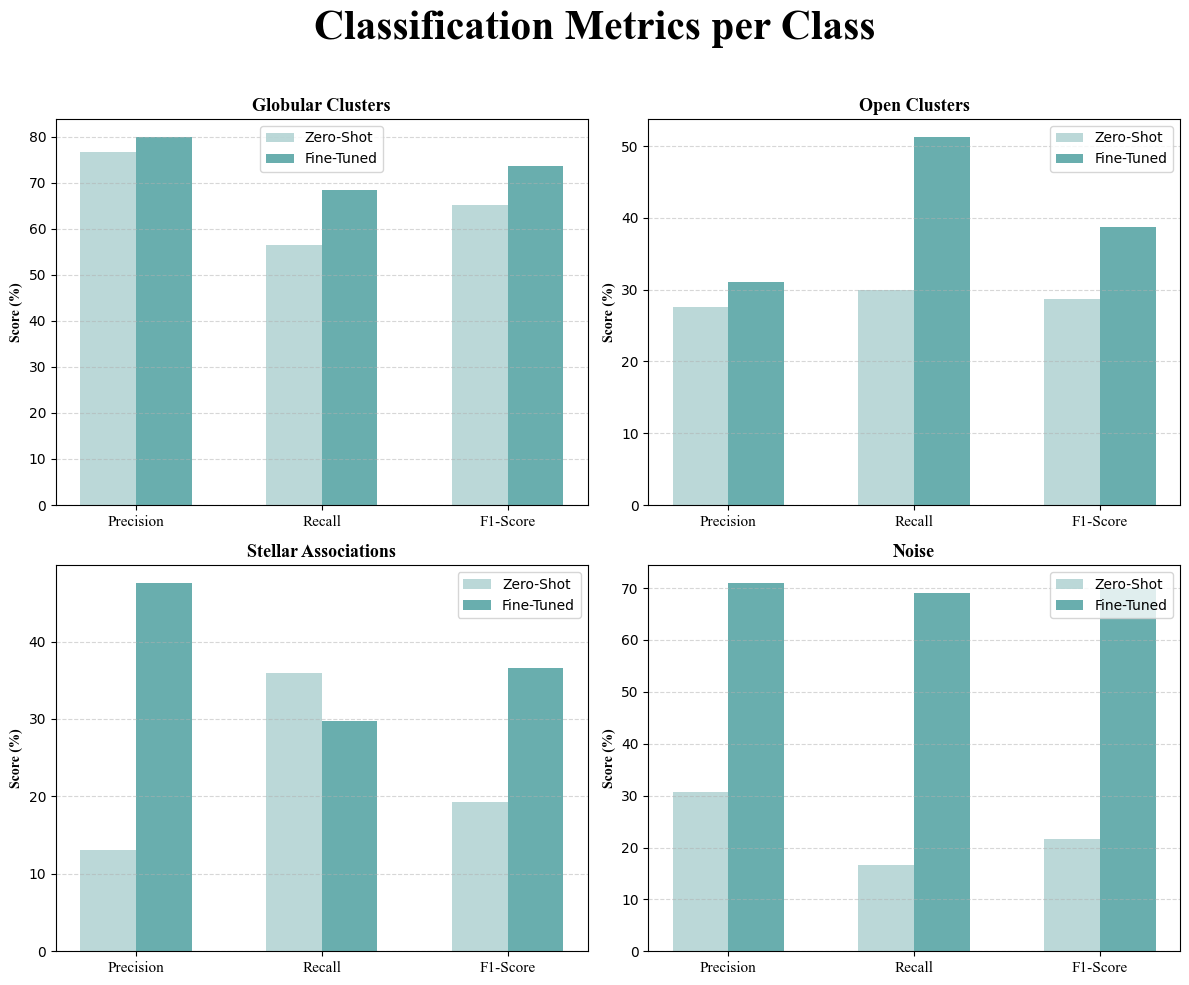

In [69]:

classes = ["Globular Clusters", "Open Clusters", "Stellar Associations", "Noise"]
metrics = ["Precision", "Recall", "F1-Score"]

zero_shot_metrics = np.array([[76.61, 56.55, 65.07], [27.59, 30.0, 28.74], [13.14, 35.94, 19.25], [30.68, 16.67, 21.6]])
fine_tuned_metrics = np.array([[79.86, 68.45, 73.72], [31.06, 51.25, 38.68], [47.5, 29.69, 36.54], [70.89, 69.14, 70.0]])

x = np.arange(len(metrics))  
width = 0.3 
colors = 	["#9fc8c8", "#298c8c"]  

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
fig.suptitle("Classification Metrics per Class", fontsize=30, fontweight="bold", fontname="Times New Roman")

for i, ax in enumerate(axes.flat):
    ax.bar(x - width/2, zero_shot_metrics[i], width=width, label="Zero-Shot", color=colors[0], alpha=0.7)
    ax.bar(x + width/2, fine_tuned_metrics[i], width=width, label="Fine-Tuned", color=colors[1], alpha=0.7)

    ax.set_xticks(x)
    ax.set_xticklabels(metrics, fontname="Times New Roman", fontsize=11)
    ax.set_ylabel("Score (%)", fontname="Times New Roman", fontweight="bold")
    ax.set_title(classes[i], fontsize=13, fontweight="bold", fontname="Times New Roman")
    ax.legend()
    ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
